## Work
1. 請嘗試將 preproc_x 替換成以每筆資料的 min/max 進行標準化至 -1 ~ 1 間，再進行訓練
2. 請嘗試將 mlp 疊更深 (e.g 5~10 層)，進行訓練後觀察 learning curve 的走勢
3. (optional) 請改用 GPU 進行訓練 (如果你有 GPU 的話)，比較使用 CPU 與 GPU 的訓練速度

In [27]:
## 
"""
Your code here (optional)
確認硬體資源
"""

'\nYour code here (optional)\n確認硬體資源\n'

In [28]:
import os
import keras

# 請嘗試設定 GPU：os.environ

# 本範例不需使用 GPU, 將 GPU 設定為 "無"
os.environ["CUDA_VISIBLE_DEVICES"] = ""

In [29]:
train, test = keras.datasets.cifar10.load_data()

In [30]:
## 資料前處理
"""
Your code here
"""
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [31]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [32]:
"""Code Here
建立你的神經網路
"""
def build_mlp():
    input_layer = keras.layers.Input([x_train.shape[-1]])
    x = keras.layers.Dense(units=1024, activation="relu")(input_layer)
    x = keras.layers.Dense(units=512, activation="relu")(x)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    x = keras.layers.Dense(units=64, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [34]:
model = build_mlp()
model.summary()
## 超參數設定
LEARNING_RATE = 0.001
EPOCHS = 100
BATCH_SIZE = 256

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
dense_1 (Dense)              (None, 1024)              3146752   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               524800    
_________________________________________________________________
dense_3 (Dense)              (None, 256)               131328    
_________________________________________________________________
dense_4 (Dense)              (None, 128)               32896     
_________________________________________________________________
dense_5 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_6 (Dense)              (None, 10)                650       
Total para

In [35]:
optimizer = keras.optimizers.Adam(lr=LEARNING_RATE)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [36]:
model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/100
50000/50000 [==============================] - 14s 286us/step - loss: 1.9689 - acc: 0.2777 - val_loss: 1.7514 - val_acc: 0.3718
Epoch 2/100
50000/50000 [==============================] - 14s 282us/step - loss: 1.7238 - acc: 0.3799 - val_loss: 1.6517 - val_acc: 0.4137
Epoch 3/100
50000/50000 [==============================] - 14s 283us/step - loss: 1.6228 - acc: 0.4194 - val_loss: 1.5524 - val_acc: 0.4423
Epoch 4/100
50000/50000 [==============================] - 15s 293us/step - loss: 1.5648 - acc: 0.4409 - val_loss: 1.5427 - val_acc: 0.4431
Epoch 5/100
50000/50000 [==============================] - 14s 288us/step - loss: 1.5133 - acc: 0.4563 - val_loss: 1.4893 - val_acc: 0.4704
Epoch 6/100
50000/50000 [==============================] - 15s 295us/step - loss: 1.4685 - acc: 0.4761 - val_loss: 1.4859 - val_acc: 0.4691
Epoch 7/100
50000/50000 [==============================] - 15s

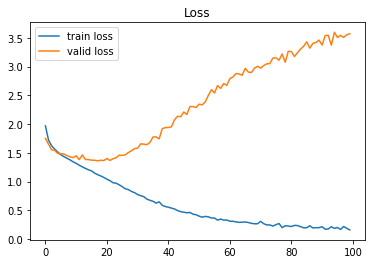

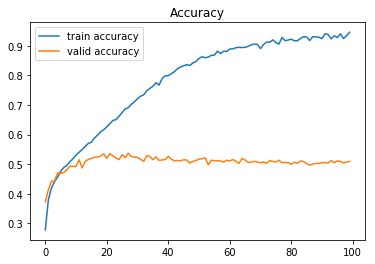

In [37]:
import matplotlib.pyplot as plt


train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()